In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [28]:
a=1
b=a+0
b+=1
print(a)

1


In [2]:
#os.chdir("/Users/shuyuqin/m3_learning/m3_learning/src/m3_learning/")

In [2]:
sys.path.append('../../')
sys.path.append('/Users/shuyuqin/m3_learning/m3_learning/src/m3_learning/nn')

In [7]:
%load_ext autoreload
%autoreload 2
from CCSTAE.dataProcess import *
from CCSTAE.lossFuc import *
#from CCSTAE.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
dir_path = os.path.abspath("/Users/shuyuqin/toy_4dstem.h5")
abs_path = os.path.abspath("/Users/shuyuqin/")
data_path = os.path.abspath("/Users/shuyuqin/polycrystal_output4D.mat")
angle_path = os.path.abspath('/Users/shuyuqin/py4dstem_result/10%/L1_0.0000001680_scale_70.830_shear_2.360_lr_0.000139_batchpara_01_Epoch_0001_trainloss_0.003344_.h5')

In [9]:
f = h5py.File(angle_path,'r')

In [10]:
f.keys()

<KeysViewHDF5 ['base', 'loss', 'mask_list', 'rotation', 'scale_shear']>

In [11]:
test_rotation = f['rotation'][0:2500]

In [12]:
f = STEM4D_DataSet(dir_path,background_intensity=0.6,rotation=test_rotation)

/Users/shuyuqin/toy_4dstem.h5


100%|██████████| 2500/2500 [00:00<00:00, 1527200.70it/s]


In [13]:
dataset = f.stem4d_data
data_with_rotation = f.stem4d_rotation

In [14]:
train_iterator = DataLoader(data_with_rotation, batch_size=3, shuffle=True, num_workers=0)
test_iterator = DataLoader(dataset, batch_size=3, shuffle=True, num_workers=0)

In [19]:
for x in train_iterator:
    if type(x) == list:
        print('goubada')
    #print(type(x))

goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada
goubada


In [31]:
gouba = {'train_loss': 10.5,
         'l2_loss': 1e-5}

In [34]:
gouba["l2_loss"]

1e-05

1738

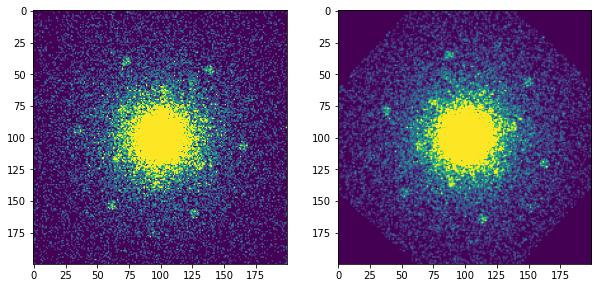

In [84]:
i = np.random.randint(2500)

sam = np.copy(data_with_rotation[i][0]).squeeze()
cos_i = np.cos(data_with_rotation[i][1])
sin_i = np.sin(data_with_rotation[i][1])
try_sth = torch.tensor(sam,dtype=torch.float).unsqueeze(0).unsqueeze(1)
theta_1 = torch.tensor([
     [cos_i, -sin_i , 0],
     [sin_i,cos_i, 0]
     ], dtype=torch.float)
grid = F.affine_grid(theta_1.unsqueeze(0), try_sth.size()) 
sam_out = F.grid_sample(try_sth, grid).squeeze()


fig,ax=plt.subplots(1,2,figsize = (10,5))
ax[0].imshow(dataset[i],clim=[0,1])
ax[1].imshow(sam_out,clim=[0,1])
i

In [88]:
weighted_difference_loss(torch.tensor(dataset[i]),sam_out)

tensor(9.6060, dtype=torch.float64)